In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.models import load_model

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

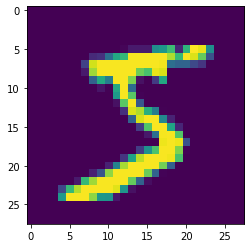

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

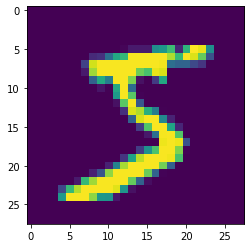

In [10]:
plt.imshow(X_train[0])

In [27]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import  ModelCheckpoint
mc = ModelCheckpoint("./bestmodel2.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
cb=[mc]

In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [123]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2,callbacks=cb)

Epoch 1/25
1480/1500 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9873
Epoch 1: val_accuracy did not improve from 0.97275
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9873 - val_loss: 0.0980 - val_accuracy: 0.9711
Epoch 2/25
1476/1500 [============================>.] - ETA: 0s - loss: 0.0338 - accuracy: 0.9893
Epoch 2: val_accuracy improved from 0.97275 to 0.97450, saving model to ./bestmodel2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0992 - val_accuracy: 0.9745
Epoch 3/25
1482/1500 [============================>.] - ETA: 0s - loss: 0.0274 - accuracy: 0.9907
Epoch 3: val_accuracy improved from 0.97450 to 0.97592, saving model to ./bestmodel2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0956 - val_accuracy: 0.9759
Epoch 4/25
1482/1500 [============================>.] - ETA: 0s - loss: 0.0227 -

In [124]:
y_prob = model.predict(X_test)


In [125]:
y_pred = y_prob.argmax(axis=1)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9778

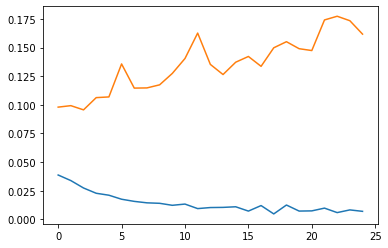

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

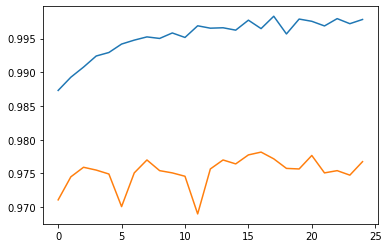

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

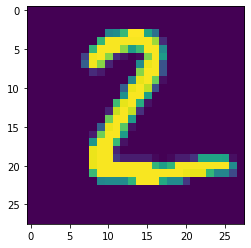

In [156]:
plt.imshow(X_test[1])

In [130]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

array([9])

Predicted Digit: 2


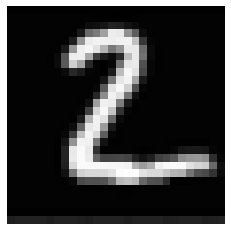

In [157]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('bestmodel2.h5')

# Load and preprocess the handwritten image
image_path = '2.png'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to MNIST size
image = np.array(image) / 255.0  # Normalize pixel values

# Reshape the image to match the model's input shape
image = np.reshape(image, (1, 28, 28))

# Make predictions
predictions = model.predict(image)
predicted_digit = np.argmax(predictions)

print('Predicted Digit:', predicted_digit)

# Plot the image
plt.imshow(image[0], cmap='gray')
plt.axis('off')
plt.show()
